<a href="https://colab.research.google.com/github/P-muriuki/Work_Associated_Projects/blob/main/KMEANS_PRESENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIRECTORY

This is a dataset contains customer information based on their spending behaviour. Here is a directory.



*   'CUST_ID' - Unique customer Identifier
*   'PURCHASES' - Value of purchases made. These are the repetitive kind of purchases

*   'ONEOFF_PURCHASES' - Value of one off purchases.
*   'INSTALLMENTS_PURCHASES' - Value of purchases made in instalments.
*   'CASH_ADVANCE' - Value of cash in advance paid for goods under Hire Purchase Price.
*   'ONEOFF_PURCHASES_FREQUENCY' - Number of one off purchases.

*   'CREDIT_LIMIT' - Value of goods that the customer can take on Hire Purchase Price.
*   'PAYMENTS' - Full payments made through Hire Purchase Price.

*   'MINIMUM_PAYMENTS' - Minimum payments made by the customer.
*   'TENURE' - Duration of the Hire Purchase Price

# PRE-PROCESSING AND EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/Customer_Data GIZ.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.drop(columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT'],axis = 1, inplace = True)

In [ ]:
df.columns

Index(['CUST_ID', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
df.isnull().sum()

CUST_ID                         0
PURCHASES                       0
ONEOFF_PURCHASES                0
INSTALLMENTS_PURCHASES          0
CASH_ADVANCE                    0
ONEOFF_PURCHASES_FREQUENCY      0
CREDIT_LIMIT                    1
PAYMENTS                        0
MINIMUM_PAYMENTS              313
TENURE                          0
dtype: int64

In [ ]:
df.shape

(8950, 10)

In [ ]:
df.describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,1003.204834,592.437371,411.067645,978.871112,0.202458,4494.449450,1733.143852,864.206542,11.517318
std,2136.634782,1659.887917,904.338115,2097.163877,0.298336,3638.815725,2895.063757,2372.446607,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,39.635000,0.000000,0.000000,0.000000,0.000000,1600.000000,383.276166,169.123707,12.000000
50%,361.280000,38.000000,89.000000,0.000000,0.083333,3000.000000,856.901546,312.343947,12.000000
75%,1110.130000,577.405000,468.637500,1113.821139,0.300000,6500.000000,1901.134317,825.485459,12.000000
max,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,30000.000000,50721.483360,76406.207520,12.000000


In [ ]:
df.dropna(subset = ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], inplace = True)

In [ ]:
df2 = df.drop(columns = 'CUST_ID', axis = 1)

In [ ]:
df.columns[1:]

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
df.columns

Index(['CUST_ID', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
df2.TENURE.unique()

array([12,  8, 11,  9, 10,  6,  7])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

df_scaled = pd.DataFrame(df_scaled, columns = df.columns[1:])

In [ ]:
print(f"{df_scaled.columns}")
print("\n")
print(f"{df2.columns}")

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')


Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')


2D COMPARISONS

# PURCHASES AND CREDIT LIMITS

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
focus = df_scaled[['PURCHASES', 'CREDIT_LIMIT']]

In [ ]:
sse = []
silhouette_scores = []
for i in range(2,20):
  kmeans = KMeans(n_clusters= i, init = 'k-means++')
  kmeans.fit(focus)
  sse.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(focus, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

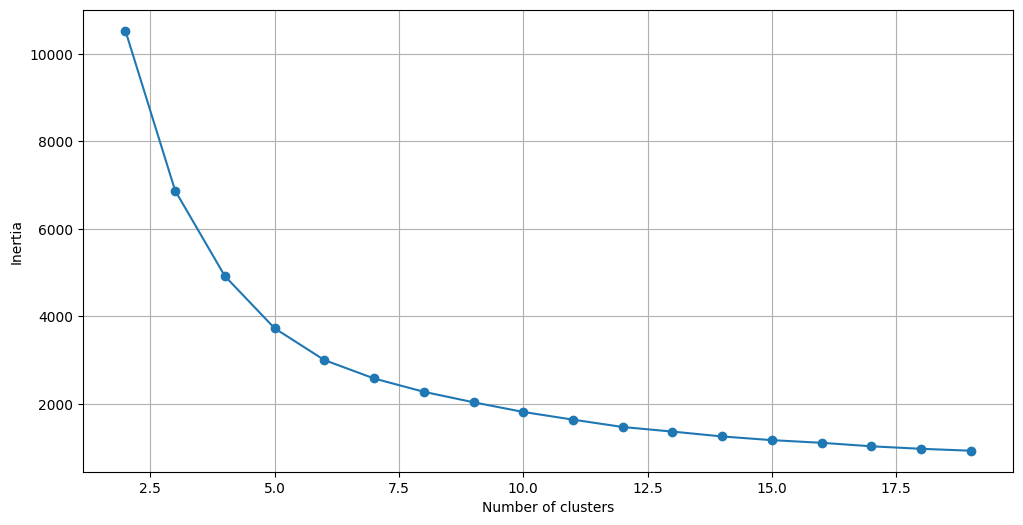

In [ ]:
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':sse})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()

In [ ]:
silhouette_scores

[0.5579526059719494,
 0.5487294431362223,
 0.5537400215553747,
 0.503068167867053,
 0.5224290127794526,
 0.4713035544077185,
 0.47704271030710793,
 0.41171031320081397,
 0.42223106576761477,
 0.4272526076387215,
 0.4320928283076761,
 0.40977447089226815,
 0.4296128396368563,
 0.4314295408949215,
 0.42765448859864,
 0.41319848564196754,
 0.4244924546384003,
 0.41952908535583966]

In [ ]:
# This code builds on the previous example
from sklearn.metrics import calinski_harabasz_score
cluster_assignments = kmeans.predict(focus)
# Note that we could also pass in k_means.labels_ instead of cluster_assignments
print(calinski_harabasz_score(focus, cluster_assignments))

8444.684129210742


In [ ]:
# for col in df_scaled.columns:
#   for col2 in df_scaled.columns:
#     if col != col2:
#       silhouette_scores = []
#       for i in range(2,20):
#         kmeans = KMeans(n_clusters= i, init = 'k-means++')
#         kmeans.fit(df_scaled[[col,col2]])
#         sse.append(kmeans.inertia_)
#         silhouette_scores.append(silhouette_score(focus, kmeans.labels_))

#         for num in silhouette_scores:
#           if num >= 0.6:
#             print(col,col2)

#           else:
#             continue
#     else:
#       continue


In [ ]:
# plt.plot(range(2, 20), silhouette_scores)
# plt.title('Silhouette Analysis')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.grid()
# plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
df_scaled.columns

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++')
kmeans.fit(focus)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

The kmeans test could be a point of observation as to the purple cluster of people who have low purchases but yet have a fairly high value offer on their credit limits.

# Visualization

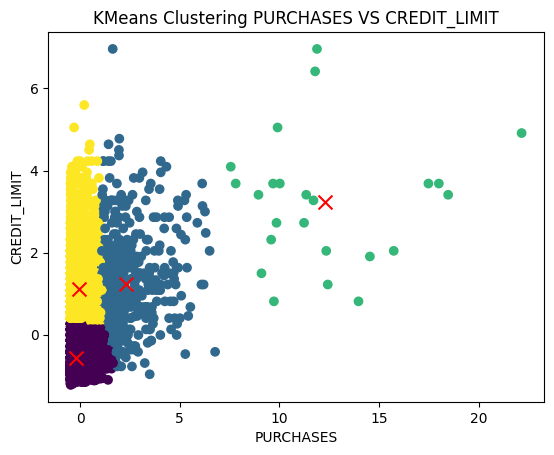

In [ ]:
plt.scatter(focus.iloc[:, 0], focus.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100)  # Plot centroids
plt.title(f'KMeans Clustering {focus.columns[0]} VS {focus.columns[1]}')
plt.xlabel(f'{focus.columns[0]}')
plt.ylabel(f'{focus.columns[1]}')
plt.show()

# PURCHASES AND PAYMENTS

In [ ]:
focus = df_scaled[['PURCHASES', 'PAYMENTS']]

In [ ]:
sse = []
silhouette_scores = []
for i in range(2,20):
  kmeans = KMeans(n_clusters= i, init = 'k-means++')
  kmeans.fit(focus)
  sse.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(focus, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

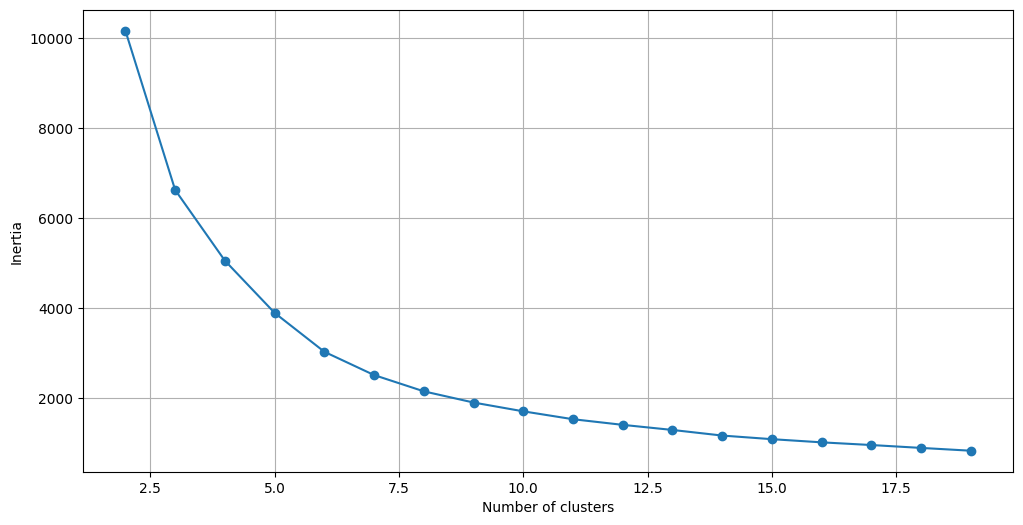

In [ ]:
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':sse})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()

In [ ]:
silhouette_scores

[0.8394168355465983,
 0.7345002937379437,
 0.632993783765578,
 0.6126400669538842,
 0.6372900161488028,
 0.5246632542294227,
 0.5593982518630827,
 0.559409318240965,
 0.5342053374695185,
 0.4949461568417876,
 0.43225516468624275,
 0.47700321294956477,
 0.4818244369573134,
 0.4651641345177052,
 0.47762231569831554,
 0.46089226705366193,
 0.46671410152148457,
 0.4626289163274758]

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
df_scaled.columns

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++')
kmeans.fit(focus)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

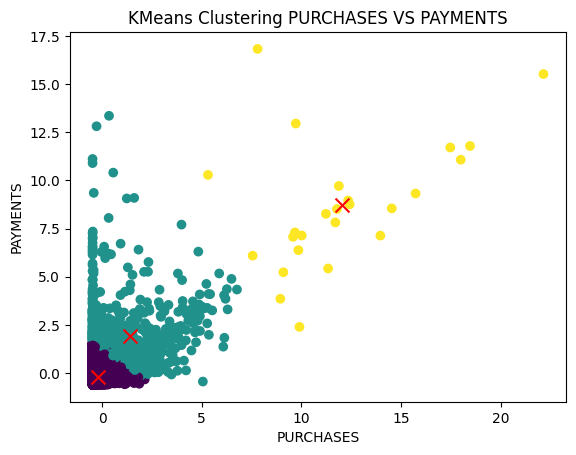

In [ ]:
plt.scatter(focus.iloc[:, 0], focus.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100)  # Plot centroids
plt.title(f'KMeans Clustering {focus.columns[0]} VS {focus.columns[1]}')
plt.xlabel(f'{focus.columns[0]}')
plt.ylabel(f'{focus.columns[1]}')
plt.show()

# Visualization

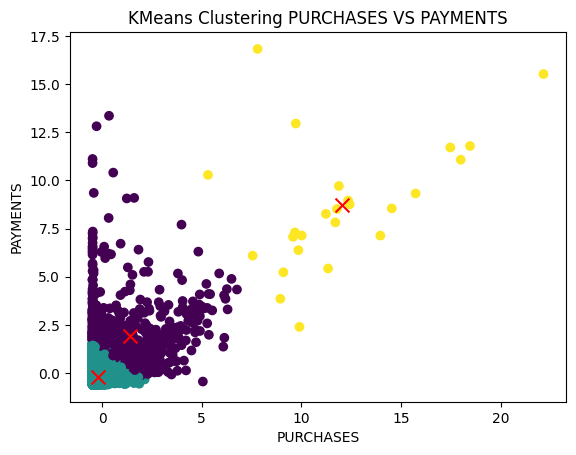

In [ ]:
plt.scatter(focus.iloc[:, 0], focus.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100)  # Plot centroids
plt.title(f'KMeans Clustering {focus.columns[0]} VS {focus.columns[1]}')
plt.xlabel(f'{focus.columns[0]}')
plt.ylabel(f'{focus.columns[1]}')
plt.show()

In the graph above, there 3 clusters of people. It is clear that people with more purchases are more likely to have full payments through hire purchase price. It is also a point to note that there are some exclusions for people with smaller purchases but have made full payments still.